In [1]:
from mpytools import Catalog
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from hist_syst import plt_hpsyst

target_4m_lrg = Catalog.read('/pscratch/sd/a/arocher/4MOST/target_lrg_4most_v2.fits')
target_4m_bg = Catalog.read('/pscratch/sd/a/arocher/4MOST/target_bg_mag_r19_4most_v2.fits')
mask_pixmap = Catalog.read('/pscratch/sd/e/edmondc/antoine/Legacy_Imaging_DR10_footprint_128.fits')
features_pixmap = Catalog.read('/pscratch/sd/e/edmondc/antoine/pixweight-dr10-128-new.fits')




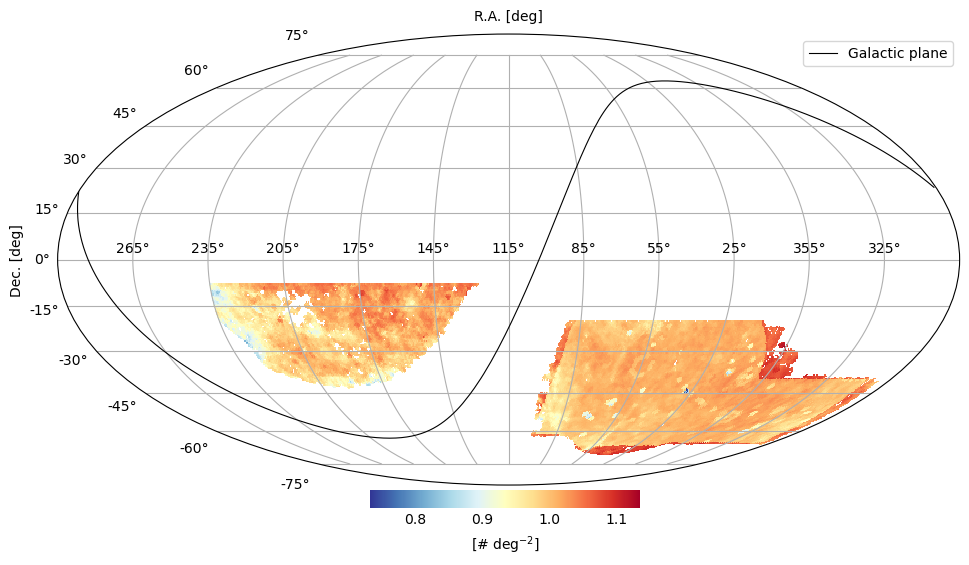

In [3]:
nside=128 
tracer='LRG'
targets = utils.create_hp_map(target_4m_lrg['RA'], target_4m_lrg['DEC'], nside=nside, nest=True)

w = utils.get_wmap(targets, features_pixmap, mask_pixmap, tracer=tracer, regions=['DECALS', 'DES'])
utils.plot_moll(w, nest=True)

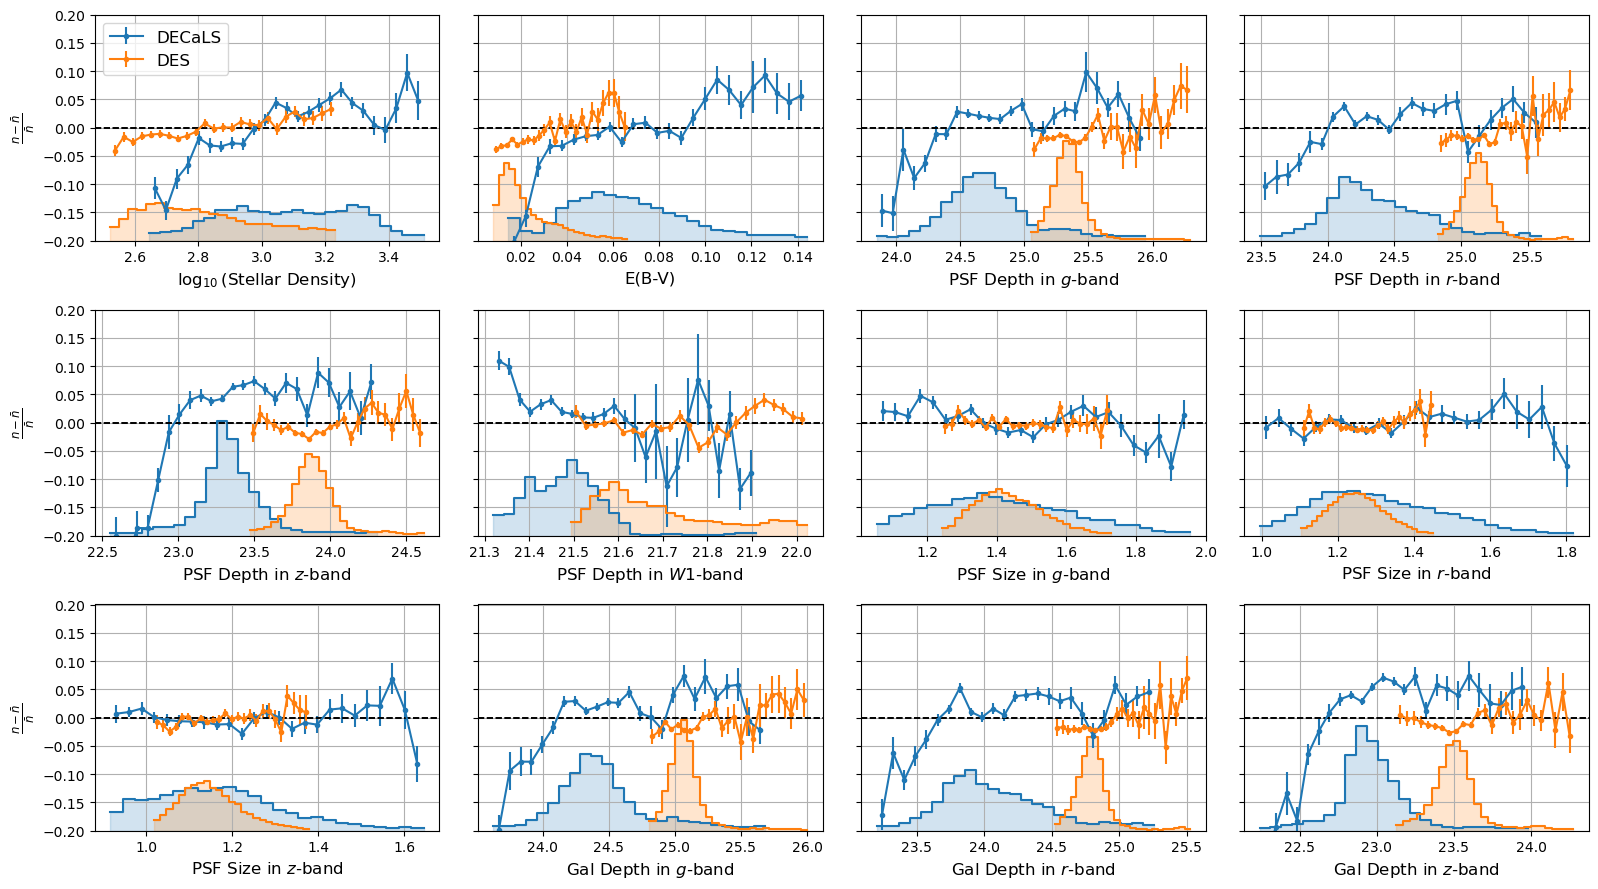

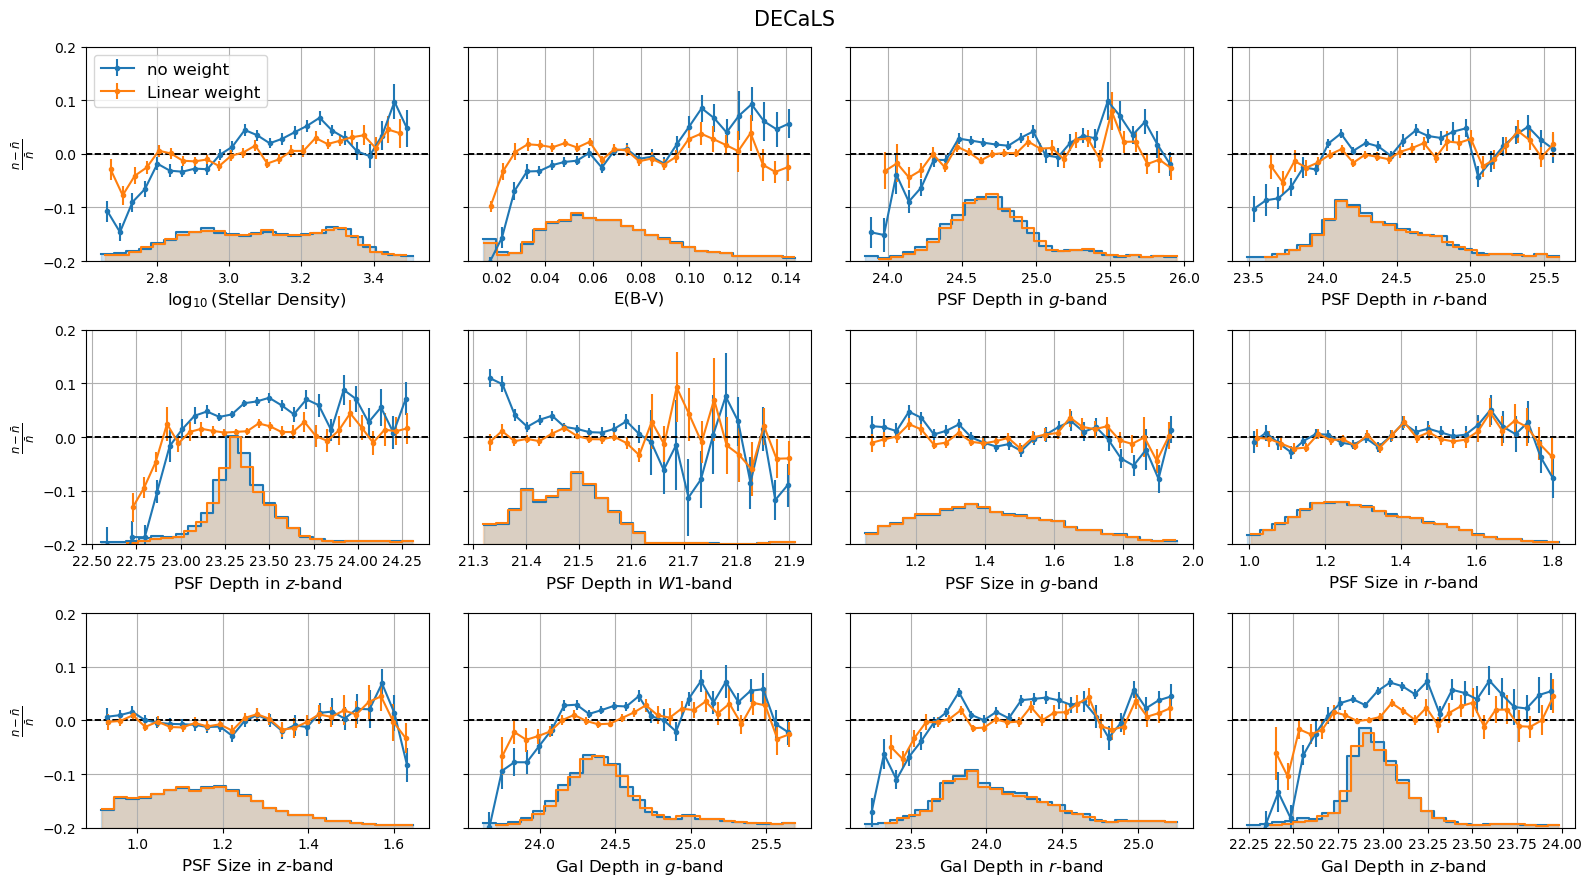

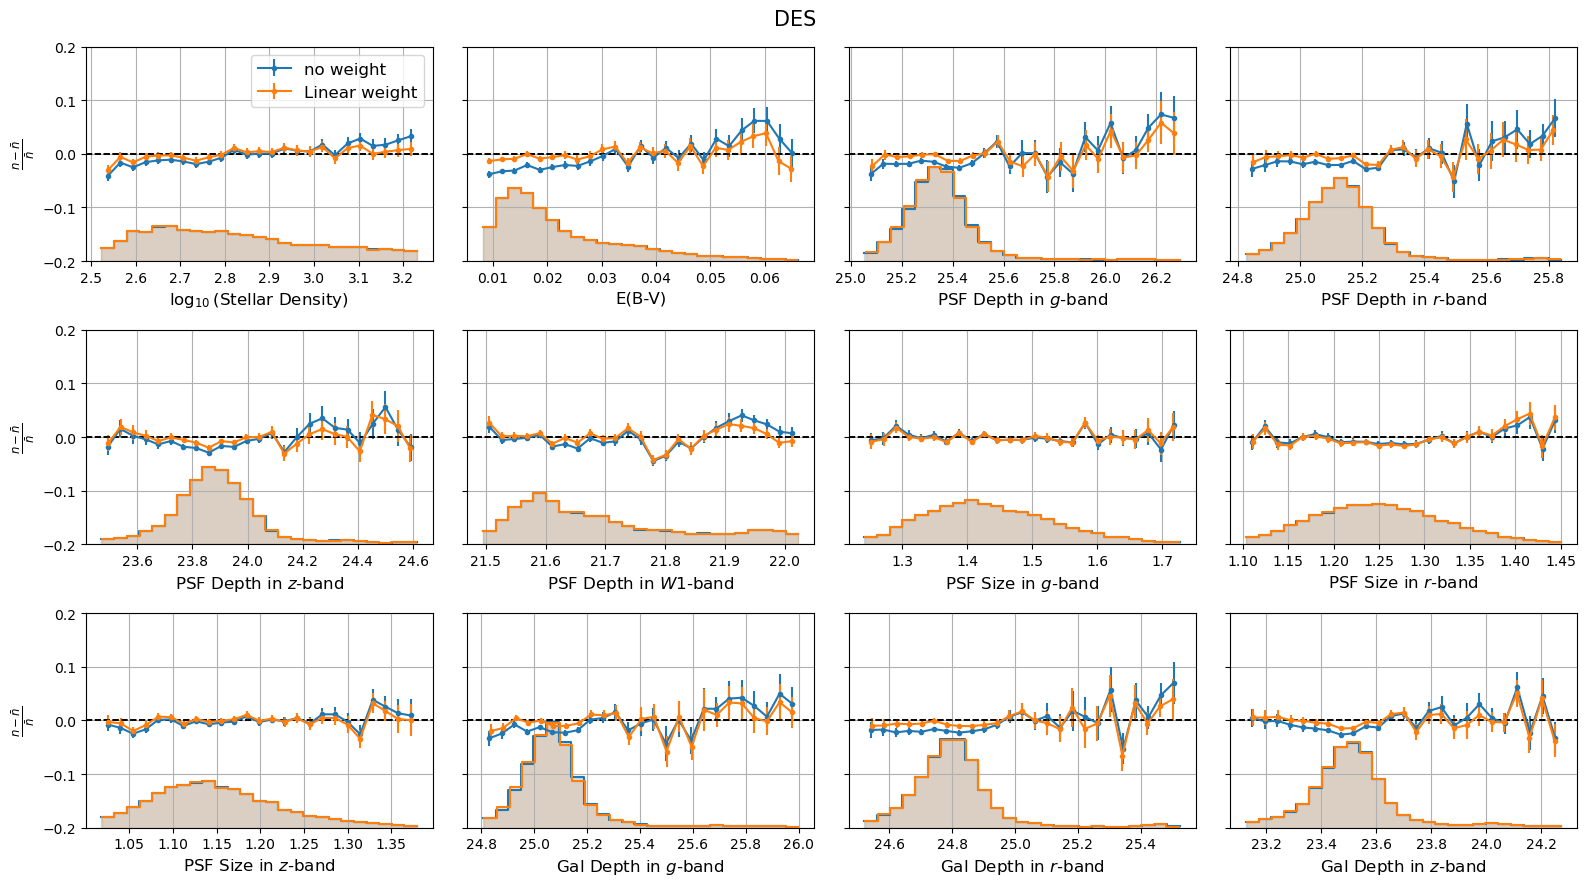

In [5]:
mask_DECALS = ~mask_pixmap['ISDES'] & mask_pixmap['IS4MOST_LRG']
mask_DES = mask_pixmap['ISDES'] & mask_pixmap['IS4MOST_LRG']

    
    
targets_map = [utils.apply_mask_to_hpmap(targets, mask_DECALS), utils.apply_mask_to_hpmap(targets, mask_DES)]
wtargets_map = [utils.apply_mask_to_hpmap(targets*w, mask_DECALS), utils.apply_mask_to_hpmap(targets*w, mask_DES)]

labels_map = ['DECaLS', 'DES']
utils.plot_systmematics(targets_map, features_pixmap, labels_map=labels_map)

title = 'DECaLS'
labels_map = ['no weight', 'Linear weight']
utils.plot_systmematics([targets_map[0], wtargets_map[0]], features_pixmap, labels_map=labels_map, fig_title=title)
title = 'DES'
utils.plot_systmematics([targets_map[1], wtargets_map[1]], features_pixmap, labels_map=labels_map, fig_title=title)

